In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()

In [4]:
print ("iris_dataset의 키: \n{}".format(iris_dataset.keys()))

iris_dataset의 키: 
dict_keys(['feature_names', 'target_names', 'target', 'DESCR', 'data'])


In [11]:
print(format(iris_dataset['target_names']))
print(format(iris_dataset['feature_names']))
print(format(type(iris_dataset['data'])))

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'numpy.ndarray'>


In [12]:
# 테스트셋 뽑기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [14]:
print(format(X_train.shape))
print(format(X_test.shape))
print(format(y_train.shape))
print(format(y_test.shape))

(112, 4)
(38, 4)
(112,)
(38,)


In [17]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112ea3a20>,
      dtype=object)

/Users/Donghee/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


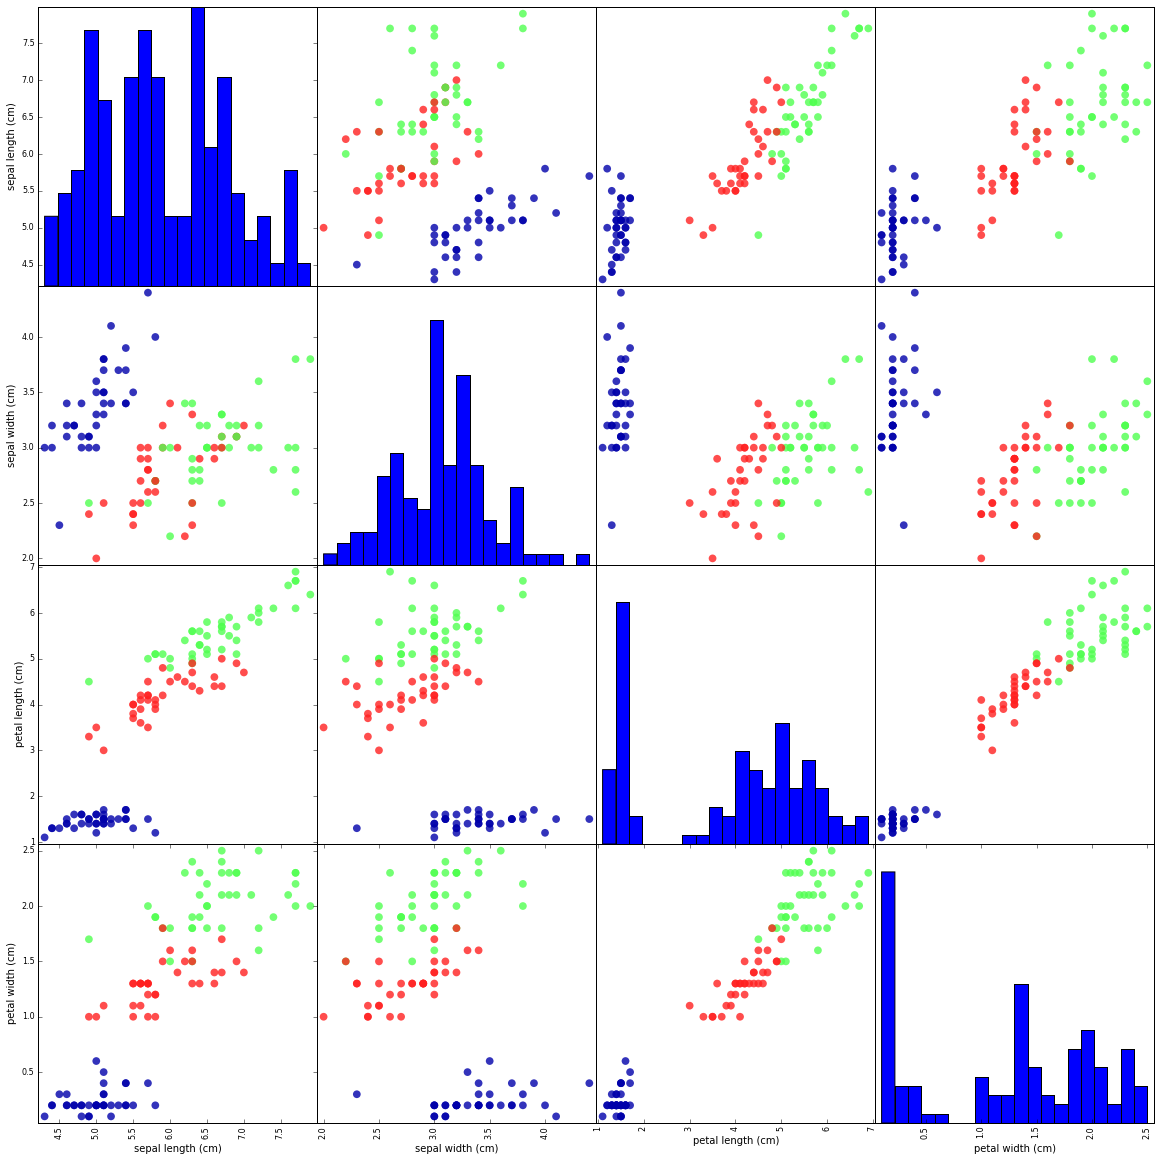

In [18]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(20,20), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # 여기서 1은 가장 가까운 1개의 분류값을 따르겠다는 뜻

In [20]:
# 3단계: 학습(fit), 예측(predict), 평가(score) #
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [21]:
X_new = np.array([[5, 2.9, 1, 0.2]])

In [22]:
prediction = knn.predict(X_new)
print(format(prediction))
print(format(iris_dataset['target_names'][prediction]))

[0]
['setosa']


In [23]:
y_pred = knn.predict(X_test)

In [24]:
# 예측값과 실제값이 같으면 1, 다르면 0, 그 평균값이 스코어
print(format(np.mean(y_pred == y_test)))

0.9736842105263158


In [25]:
print(format(knn.score(X_test, y_test)))

0.9736842105263158


In [29]:
# 기억해야 할 3가지
# .fit .predict .score